In [23]:
import numpy as np
import pandas as pd
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
# 数据清洗
train = pd.read_csv('DATA/sales_train_v2.csv')
test = pd.read_csv('DATA/test.csv')
shops = pd.read_csv('DATA/items.csv')
items = pd.read_csv('DATA/items.csv')
item_categories = pd.read_csv('DATA/item_categories.csv')

In [25]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


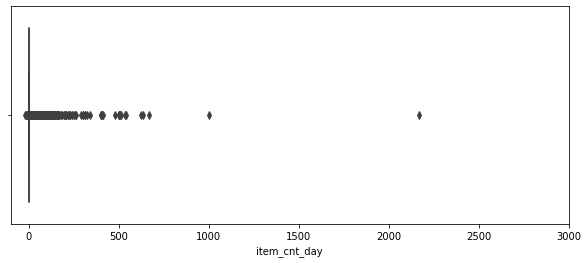

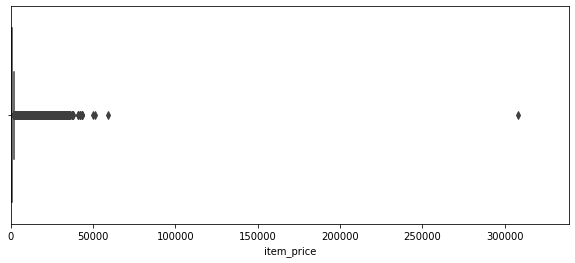

In [26]:
plt.figure(figsize=(10,4))
plt.xlim(-100,3000)
sns.boxplot(x=train.item_cnt_day) # 自变量
plt.figure(figsize=(10,4))
plt.xlim(train.item_price.min(),train.item_price.max()*1.1) 
sns.boxplot(x=train.item_price)

In [27]:
train= train[train.item_cnt_day<1001]
train = train[train.item_cnt_day>0]
train = train[train.item_price<250000]
train = train[train.item_price>1]

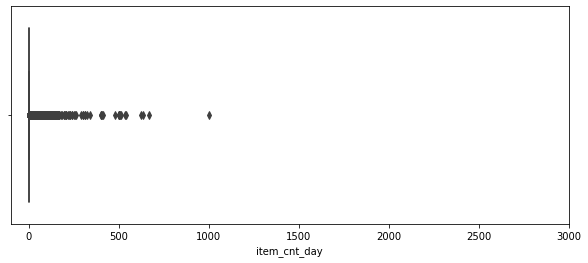

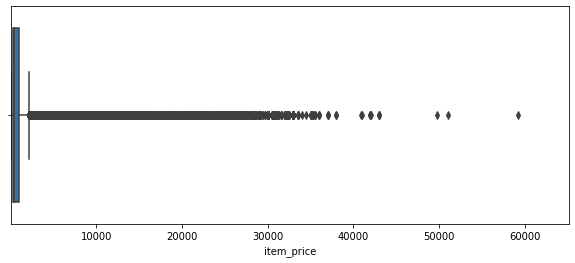

In [28]:
plt.figure(figsize=(10,4))
plt.xlim(-100,3000)
sns.boxplot(x=train.item_cnt_day) # 自变量
plt.figure(figsize=(10,4))
plt.xlim(train.item_price.min(),train.item_price.max()*1.1) 
sns.boxplot(x=train.item_price)

In [29]:
# 数据重做--聚焦于item_cnt_month
# 对日期列进行变换
train['date']=pd.to_datetime(train['date'],format='%d.%m.%Y')
train['date']

0         2013-01-02
1         2013-01-03
3         2013-01-06
4         2013-01-15
5         2013-01-10
             ...    
2935844   2015-10-10
2935845   2015-10-09
2935846   2015-10-14
2935847   2015-10-22
2935848   2015-10-03
Name: date, Length: 2923837, dtype: datetime64[ns]

In [30]:
# 将数据转换为 月度销售数据
# 制作仅包含月度数据的数据集
data = train.groupby([train['date'].apply(lambda x:x.strftime("%Y-%m")),'item_id','shop_id']).sum().reset_index()
data.head()

,date,item_id,shop_id,date_block_num,item_price,item_cnt_day
0,2013-01,19,25,0,28.0,1.0
1,2013-01,27,1,0,1890.0,1.0
2,2013-01,27,2,0,2499.0,1.0
3,2013-01,27,10,0,1890.0,1.0
4,2013-01,27,19,0,2499.0,1.0


In [31]:
# 指定我们要添加到数据的重要属性
data = data[['date','item_id','shop_id','item_cnt_day']]
data.head()

,date,item_id,shop_id,item_cnt_day
0,2013-01,19,25,1.0
1,2013-01,27,1,1.0
2,2013-01,27,2,1.0
3,2013-01,27,10,1.0
4,2013-01,27,19,1.0


In [32]:
# 从数据集中选择重要的特定属性
data = data.pivot_table(index=['item_id','shop_id'],columns='date',values='item_cnt_day',fill_value=0).reset_index()
data.columns

Index(['item_id', 'shop_id', '2013-01', '2013-02', '2013-03', '2013-04',
       '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10',
       '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04',
       '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10',
       '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04',
       '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10'],
      dtype='object', name='date')

In [33]:
data.head()

date,item_id,shop_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,55,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
test.head() # 训练集和测试集变得一样

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [35]:
test=pd.merge(test,data,on=['item_id','shop_id'],how='left')
test.fillna(0,inplace=True)
test.head()

,ID,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
x_train = test.drop(['2015-10','item_id','shop_id'],axis=1) # 和提交格式有关
y_train = test['2015-10']

#删除第一列，以便可以预测未来的销售数据
x_test = test.drop(['2013-01','item_id','shop_id'],axis=1) # 保持和训练集一样的特征数

# 检查一样数据的维度
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)

Shape of x_train : (214200, 34)
Shape of x_test : (214200, 34)
Shape of y_train : (214200,)


In [37]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
mode2 = GBR.predict(x_test).clip(0,20) #把预测后的值限制在0到20之间
joblib.dump(GBR,'GBR2.pkl') # 模型保持

['GBR2.pkl']

In [39]:
mode2 = pd.DataFrame(mode2,columns=['item_cnt_month'])
mode2.head()

,item_cnt_month
0,0.502150
1,0.211889
2,0.766678
3,0.247797
4,0.211889


In [40]:
mode2.to_csv('submission.csv',index_label='ID')